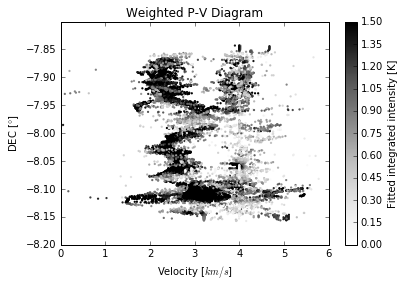

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import math

FittedData = np.genfromtxt('/home/asus/AnacondaProjects/8_Fits_Cubes_Fitting_and_analysis/CubeFittingTry8/FittedDataTry7.dat')

FittedData = FittedData[FittedData[:,12]>0]#we remove the data corresponding to negative 
#or zero II



RA = FittedData[:,2]
DEC = FittedData[:,3]
CENTRAL = FittedData[:,6]
fitted_II = FittedData[:,12]


plot = plt.scatter(CENTRAL,DEC, c=fitted_II,marker='.',
                   vmin=0, vmax=1.5, 
                   alpha=1,edgecolors='none', cmap='Greys')
cbar = plt.colorbar(plot)
cbar.set_label('Fitted integrated intensity [K]')
plt.plot(markeredgewidth=0.0, fillstyle='full')
plt.xlabel('Velocity [$km/s$]')
plt.ylabel('DEC [$\degree$]')
plt.xlim(0,6)
#plt.ylim(-8.11,-7.85)

plt.title('Weighted P-V Diagram')

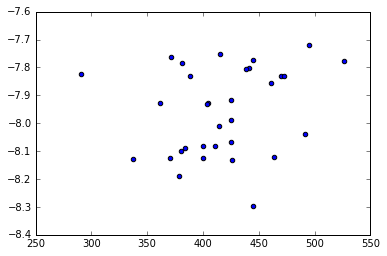

In [20]:
GAIA = np.genfromtxt('/home/asus/AnacondaProjects/9_Crossmatching/GAIACrossmatchedStars.txt',skip_header=1)

GAIAdec = GAIA[:,1]
GAIAra = GAIA[:,0]

GAIAparallax = GAIA[:,4]
GAIAparallaxerror = GAIA[:,5]

# d[pc] = 1/parallax[arcsec] so first we transform parallax into arcsec
# (gaia data is in mas)

GAIAparallax = GAIAparallax/1000 #now in arcsec
GAIAparallaxerror = GAIAparallaxerror/1000

#distance = 1/GAIAparallax
#distanceerror = 1/GAIAparallaxerror

dorion=420

npdistance = dorion*(np.tan(np.deg2rad(GAIAparallax/(60*60))))
npdistanceerror = dorion*(np.tan(np.deg2rad(GAIAparallaxerror/(60*60))))

Parallaxradians = (GAIAparallax/(60*60))*math.pi/180    #180/pi  =  lpx/radians
Parallaxerrorradians = (GAIAparallaxerror/(60*60))*math.pi/180    #180/pi  =  lpx/radians

distance = dorion*(np.tan(Parallaxradians)) #longitud del pixel en parsec
distanceerror = dorion*(np.tan(Parallaxerrorradians)) #longitud del pixel en parsec

simpledistance = 1/GAIAparallax
simpledistanceerror = 1/GAIAparallaxerror

plt.figure()
#plt.errorbar(distance,GAIAdec,yerr=None, xerr=distanceerror,ls='none')
#plt.scatter(distance,GAIAdec)

#plt.errorbar(GAIAparallax,GAIAdec,yerr=None, xerr=GAIAparallaxerror,ls='none')
#plt.scatter(GAIAparallax,GAIAdec)

#plt.errorbar(npdistance,GAIAdec,yerr=None, xerr=npdistanceerror,ls='none')
#plt.scatter(npdistance,GAIAdec)

#plt.errorbar(simpledistance,GAIAdec,yerr=None, xerr=simpledistanceerror,ls='none')
plt.scatter(simpledistance,GAIAdec)

#plt.xlim(-1000,1000)

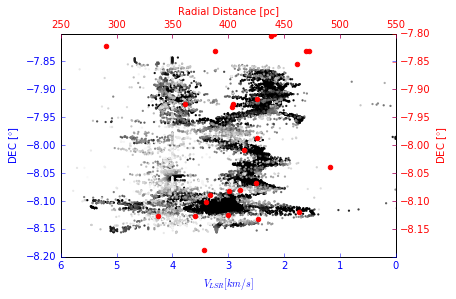

In [21]:

x_values1=[1,2,3,4,5]
y_values1=[1,2,2,4,1]

x_values2=[-1000,-800,-600,-400,-200]
y_values2=[10,20,39,40,50]

x_values3=[150,200,250,300,350]
y_values3=[10,20,30,40,50]

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.scatter(CENTRAL,DEC, c=fitted_II,marker='.',
                   vmin=0, vmax=1.5, 
                   alpha=1,edgecolors='none', cmap='Greys')
ax.set_xlabel("$V_{LSR} [km/s]$", color="b")
ax.set_xlim([0,6])

ax.set_ylabel("DEC [$\degree$]", color="b")
ax.tick_params(axis='x', colors="b")
ax.tick_params(axis='y', colors="b")
ax.invert_xaxis()

ax2.scatter(simpledistance,GAIAdec, color="r")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Radial Distance [pc]', color="r") 
ax2.set_ylabel('DEC [$\degree$]', color="r")
ax2.set_ylim([-8.20,-7.80])

ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="r")
ax2.tick_params(axis='y', colors="r")

#plt.show()

plt.savefig('RestoringForceDEC.png',dpi=500)

(0, 6)

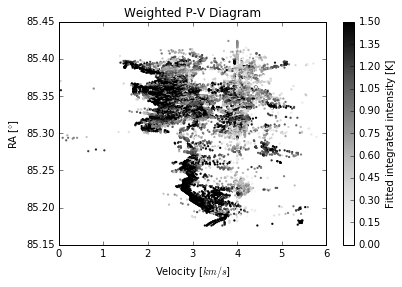

In [22]:
plt.scatter(CENTRAL,RA, c=fitted_II,marker='.', vmin=0, vmax=1.5, 
            alpha=1, edgecolors='none', cmap='Greys')

cbar = plt.colorbar()
cbar.set_label('Fitted integrated intensity [K]')
plt.plot(markeredgewidth=0.0, fillstyle='full')
plt.xlabel('Velocity [$km/s$]')
plt.ylabel('RA [$\degree$]')
plt.title('Weighted P-V Diagram')
plt.xlim(0,6)
#plt.savefig('Weighted_PV_Diagram_RA.png', dpi=600)

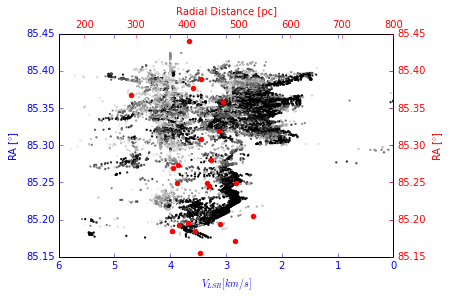

In [34]:

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.scatter(CENTRAL,RA, c=fitted_II,marker='.',
                   vmin=0, vmax=1.5, 
                   alpha=1,edgecolors='none', cmap='Greys')
ax.set_xlabel("$V_{LSR} [km/s]$", color="b")
ax.set_xlim([0,6])

ax.set_ylabel("RA [$\degree$]", color="b")
ax.tick_params(axis='x', colors="b")
ax.tick_params(axis='y', colors="b")
ax.invert_xaxis()

GAIAra = GAIA[GAIA[:,0]<-8.05]
GAIAra = GAIA[:,0]


#ax2.errorbar(simpledistance,GAIAra, xerr=simpledistanceerror, fmt=None)
ax2.scatter(simpledistance,GAIAra, color="r")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Radial Distance [pc]', color="r") 
ax2.set_ylabel('RA [$\degree$]', color="r")
ax2.set_ylim([85.15,85.45])

ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="r")
ax2.tick_params(axis='y', colors="r")
ax2.set_xlim([150,800])

#plt.show()

plt.savefig('RestoringForceRA.png',dpi=500)

In [40]:
1/GAIAparallaxerror


array([ 5202.5234691 , 12537.49385842,  5784.84380552,  1883.70775833,
        3209.750522  , 12357.19081939, 17598.14908715,  8774.28573982,
        6352.38471549,  6614.16993818, 40461.08367029, 10840.24760453,
        9185.22075109, 29886.27910568,   910.02124899,  7376.70051767,
       25203.28762154,  2313.65561091,  7234.42535883,  2773.02868742,
        3878.18041563,  6853.80287119, 10637.36829898,  7225.13984772,
        1384.73885415, 22050.02072573,  7220.47213526,  7490.09777771,
        3652.68322604,  3211.96079307,  4186.26735785,  3600.32080347])

In [9]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)
    Plot an errorbar graph.
    
    Call signature::
    
      errorbar(x, y, yerr=None, xerr=None,
               fmt='', ecolor=None, elinewidth=None, capsize=None,
               barsabove=False, lolims=False, uplims=False,
               xlolims=False, xuplims=False, errorevery=1,
               capthick=None)
    
    Plot *x* versus *y* with error deltas in *yerr* and *xerr*.
    Vertical errorbars are plotted if *yerr* is not *None*.
    Horizontal errorbars are plotted if *xerr* is not *None*.
    
    *x*, *y*, *xerr*, and *yerr* can all be scalars, which plots a
    single error bar at *x*, *y*.
    
    Optional keyword arguments:
    
      *xerr*/*yerr*: [ scalar | N, Nx1, or 2xN array-like ]
  